# 1a lista de exercícios - Visão Computacional

* Cauê Santos
* Hellena Canuto

## Imports e configurações necessárias

In [ ]:
!pip install --upgrade Pillow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
!git clone https://github.com/nothellena/computer-vision.git

Cloning into 'computer-vision'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 3), reused 18 (delta 3), pack-reused 0
Unpacking objects: 100% (27/27), 19.40 MiB | 8.35 MiB/s, done.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2 as cv

## Questão 1
Implemente uma função que receba uma imagem em formato PPM, o tamanho n de um filtro espacial com dimensões n x n e a matriz com os pesos do filtro, e aplique o filtro com uma convolução, gerando e salvando a imagem resultante no disco em formato PPM. Você não pode usar a OpenCV em nenhum desses passos. As especificações do formato PPM podem ser encontradas aqui: https://netpbm.sourceforge.net/doc/ppm.html

In [ ]:
def get_image_from_file(file_path):
  img = Image.open(file_path)
  return np.asarray(img)

def save_image_to_file(image, file_path):
  img = Image.fromarray((image * 255).astype(np.uint8))
  img.save(file_path)

In [ ]:
def naive_convolution(image, n, kernel):
  assert n == kernel.shape[0] and n == kernel.shape[1]
  
  output = np.zeros((image.shape[0] - n + 1, 
                     image.shape[1] - n + 1, 
                     image.shape[2]))
  fliped_kernel = np.flipud(kernel)
  fliped_kernel = np.fliplr(fliped_kernel)

  for i in range(image.shape[0] - n + 1):
    for j in range(image.shape[1] - n + 1):
      for z in range(image.shape[2]):
        output[i, j , z] = (fliped_kernel * image[i: i + n,
                                                  j: j + n,
                                                  z]).sum()

  return output

In [ ]:
def apply_filter(image, n, kernel, file_path="output.ppm", print=False):
  output_img = naive_convolution(image, n, kernel)
  if print:
    plt.axis("off")
    plt.imshow(output_img)
  save_image_to_file(output_img, file_path)
  return output_img

### Testes

#### PPM P3

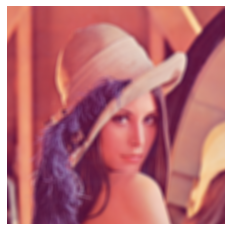

In [ ]:
img = get_image_from_file("/content/computer-vision/data/lennap3.ppm");
kernel = np.ones((11, 11)) * 1./121
_ = apply_filter(img * 1./255, kernel.shape[0], kernel, print=True)

#### PPM P6

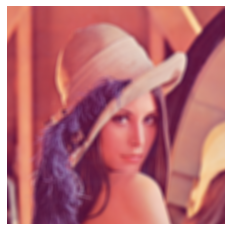

In [ ]:
img_lenna = get_image_from_file("/content/computer-vision/data/lenna.ppm") * 1./255
kernel = np.ones((11, 11)) * 1./121
_ = apply_filter(img_lenna, kernel.shape[0], kernel, print=True)

## Questão 2
Usando a função da questão 1, implemente dois tipos de filtro para remoção de ruídos e aplique-os em três imagens distintas.

In [ ]:
lenna = get_image_from_file("/content/computer-vision/data/lenna.ppm") * 1./255
robocat = get_image_from_file("/content/computer-vision/data/robocat.ppm") * 1./255
roboney = get_image_from_file("/content/computer-vision/data/roboney.ppm") * 1./255
field = get_image_from_file("field.jpeg") * 1./255
field2 = get_image_from_file("field2.jpg") * 1./255

### Filtro caixa

In [ ]:
box_filter = np.ones((9, 9)) * 1./81
box_filter

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


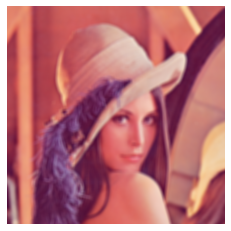

In [ ]:
_ = apply_filter(lenna, 
                 box_filter.shape[0],
                 box_filter, 
                 file_path="lenna_box_filter.ppm",
                 print=True)

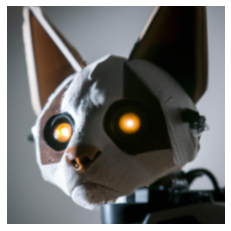

In [ ]:
_ = apply_filter(robocat, 
                 box_filter.shape[0],
                 box_filter, 
                 file_path="robocat_box_filter.ppm",
                 print=True)

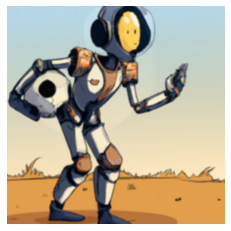

In [ ]:
_ = apply_filter(roboney, 
                 box_filter.shape[0],
                 box_filter, 
                 file_path="roboney_box_filter.ppm",
                 print=True)

### Filtro Gaussiano

In [ ]:
aux = np.array([1, 4, 6, 4, 1])
gaussian = 1./256 * (np.outer(aux, aux.T))
gaussian

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

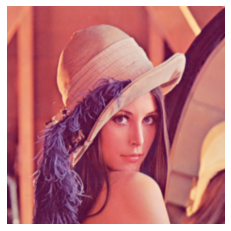

In [ ]:
_ = apply_filter(lenna, 
                 gaussian.shape[0],
                 gaussian, 
                 file_path="lenna_gaussian.ppm",
                 print=True)

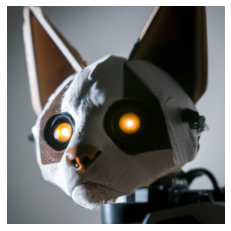

In [ ]:
_ = apply_filter(robocat, 
                 gaussian.shape[0],
                 gaussian, 
                 file_path="robocat_gaussian.ppm",
                 print=True)

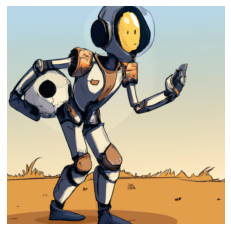

In [ ]:
_ = apply_filter(roboney, 
                 gaussian.shape[0],
                 gaussian, 
                 file_path="roboney_gaussian.ppm",
                 print=True)

## Questão 3
Usando a função da questão 1, pesquise um filtro passa-alta e aplique-o em 3 imagens distintas, variando o valor de n em 2 unidades em cada imagem. O que acontece quando n cresce?

In [ ]:
def box_filter(n):
  return  np.ones((n, n)) * 1./ (n ** 2)

In [ ]:
def id_filter(n):
  assert n % 2 == 1
  id = np.zeros((n, n), dtype="uint8")
  id[int(n / 2), int(n / 2)] =  1
  return id

In [ ]:
def clip(array):
  res = np.abs(array)
  res -= res.min()
  res /= res.max()
  return res

In [ ]:
def laplacian_kernel(n):
  box = np.ones((n, n)) * -1
  box[int(n / 2), int(n / 2)] = n ** 2 - 1
  return box

In [ ]:
def compare_hpfs(img, n, file_path="output.ppm"):
  gx1 = apply_filter(rgb_to_grey(img), 
                    n,
                    sobellike_kernel(n, axis=0), 
                    file_path=file_path)
  gx2 = apply_filter(rgb_to_grey(img), 
                    n,
                    sobellike_kernel(n, axis=1), 
                    file_path=file_path)

  grad = np.sqrt((gx1 ** 2) + (gx2 ** 2))
  grad = clip(grad)


  img_lpf = apply_filter(rgb_to_grey(img), 
                         n,
                         box_filter(n))
  img_ori = apply_filter(rgb_to_grey(img), 
                         n,
                         id_filter(n))
  img_hpf = img_ori - img_lpf
  
  fig = plt.figure(figsize=(16, 8))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.axis("off")
  ax1.title.set_text("HPF Box Filter")
  ax1.imshow(clip(img_hpf))
  
  laplacian = apply_filter(rgb_to_grey(img), 
                           n,
                           laplacian_kernel(n))

  ax2 = fig.add_subplot(1, 3, 2)
  ax2.axis("off")
  ax2.title.set_text("Laplacian")
  ax2.imshow(clip(laplacian))
  
  ax3 = fig.add_subplot(1, 3, 3)
  ax3.axis("off")
  ax3.title.set_text("Sobel Gradiente")
  ax3.imshow(grad)

  save_image_to_file(grad, file_path)

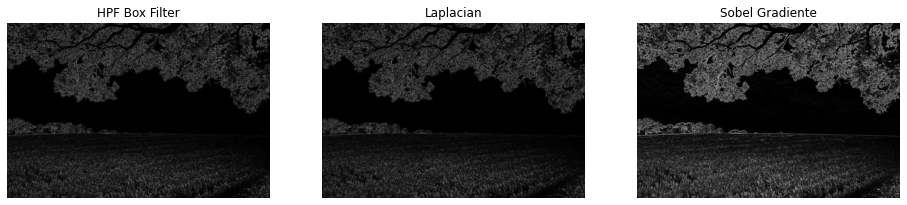

In [ ]:
_ = compare_hpfs(field, 3)

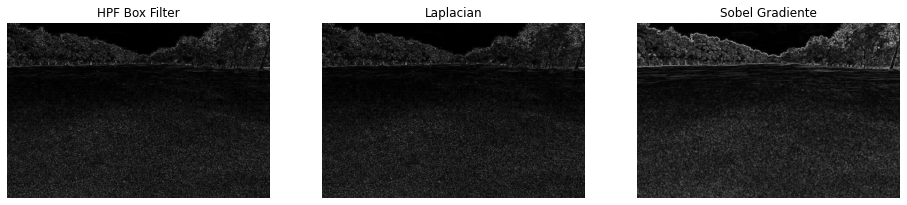

In [ ]:
_ = compare_hpfs(field2, 3)

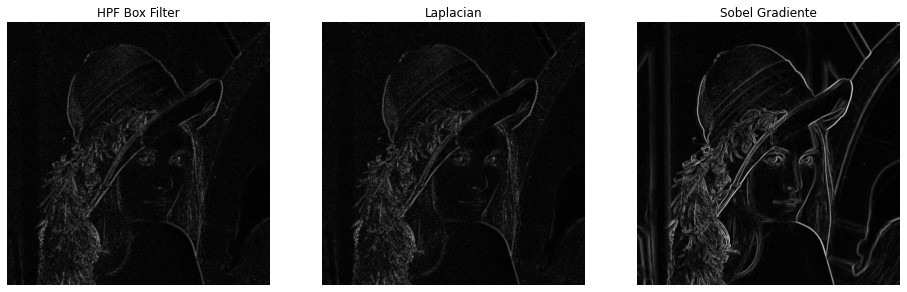

In [ ]:
_ = compare_hpfs(lenna, 3)

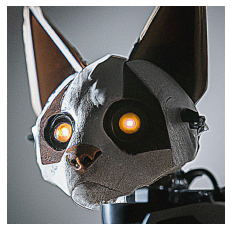

In [ ]:
n = 5
img = apply_filter(robocat, 
                   n,
                   high_pass_kernel(n), 
                   file_path="robocat_high_pass.ppm",
                   print="True")

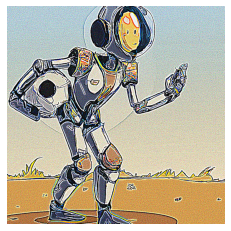

In [ ]:
n = 7
img = apply_filter(roboney, 
                   n,
                   high_pass_kernel(n), 
                   file_path="roboney_high_pass.ppm",
                   print="True")

#### Discussão
Variamos n de 3 a 7, conseguimos perceber que os detalhes da imagem aumentaram juntamente do ruído. Com n = 7, a taxa de ruído já era muito significativa. Para facilitar a comparação visual, segue uma figura com a mesma imagem, aplicando-se filtros passa alta com n=3 e n=7, respectivamente.

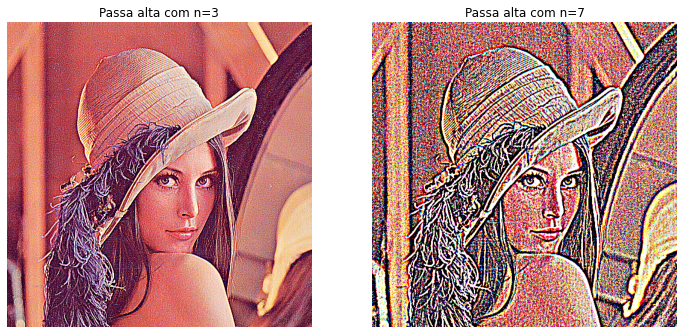

In [ ]:
img_3 = apply_filter(lenna, 
                     3,
                     high_pass_kernel(3))

img_7 = apply_filter(lenna, 
                     7,
                     high_pass_kernel(7))

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1,2,1)
ax1.axis("off")
ax1.title.set_text("Passa alta com n=3")
ax1.imshow(img_3)

ax2 = fig.add_subplot(1,2,2)
ax2.axis("off")
ax2.title.set_text("Passa alta com n=7")
ax2.imshow(img_7)

## Questão 4
Usando a função da questão 1, pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece quando n cresce?

In [ ]:
def box_filter(n):
  return  np.ones((n, n)) * 1./ (n ** 2)

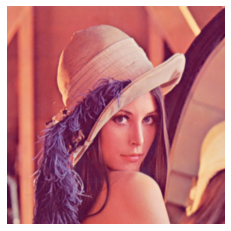

In [ ]:
n = 3
img = apply_filter(lenna, 
                   n,
                   box_filter(n), 
                   file_path="lenna_box.ppm",
                   print="True")

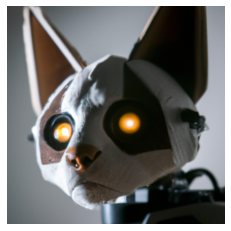

In [ ]:
n = 6
img = apply_filter(robocat, 
                   n,
                   box_filter(n), 
                   file_path="robocat_box.ppm",
                   print="True")

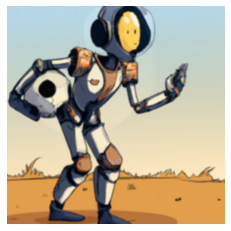

In [ ]:
n = 9
img = apply_filter(roboney, 
                   n,
                   box_filter(n), 
                   file_path="roboney_box.ppm",
                   print="True")

#### Discussão
Variamos n de 3 a 9, com isso conseguimos perceber que conforme n aumentava, a imagem gerada ficava mais borrada. Para facilitar a comparação visual, segue uma figura com a mesma imagem, aplicando-se filtros passa baixa com n=3 e n=9, respectivamente.

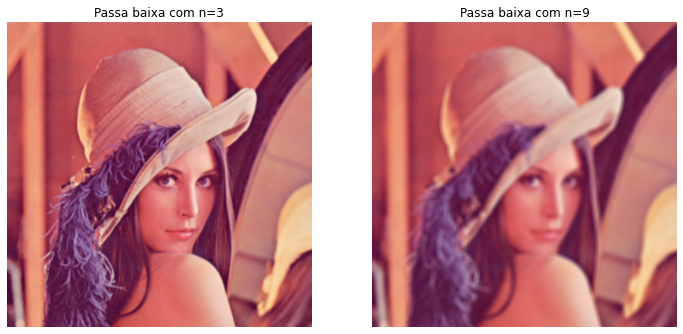

In [ ]:
img_3 = apply_filter(lenna, 
                     3,
                     box_filter(3))

img_9 = apply_filter(lenna, 
                     9,
                     box_filter(9))

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1,2,1)
ax1.axis("off")
ax1.title.set_text("Passa baixa com n=3")
ax1.imshow(img_3)

ax2 = fig.add_subplot(1,2,2)
ax2.axis("off")
ax2.title.set_text("Passa baixa com n=9")
ax2.imshow(img_9)

# Questão 5


Aplique o detector de canny usando a função `Canny()` da OpenCV em uma ou mais imagens de sua escolha. Experimente variar os parâmetros `threshold1`, `threshold2` e `apertureSize`. Explique com suas palavras a influência
de cada parâmetro no resultado.

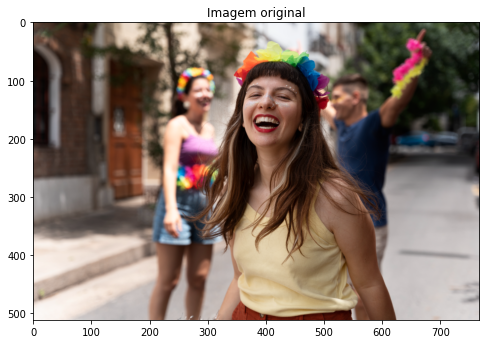

In [ ]:
bgr = cv.imread("/content/computer-vision/data/carnaval.png")
img = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title('Imagem original')
plt.show()

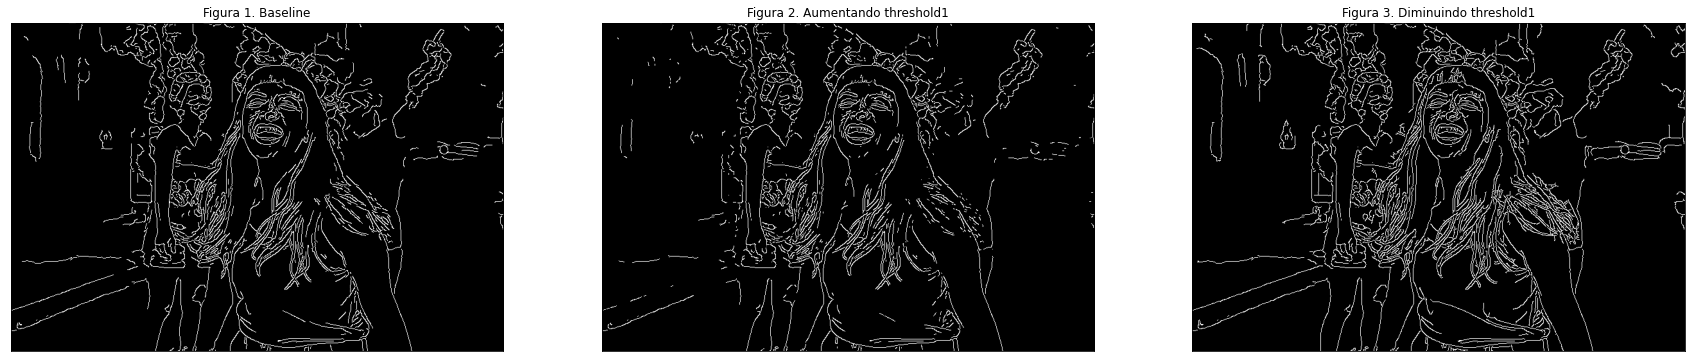

In [ ]:
# Analisando threshold1
plt.figure(figsize=(30, 10))

baseline = cv.Canny(img,threshold1=1400,threshold2 = 2000, apertureSize = 5)
plt.subplot(131), plt.imshow(baseline, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.title('Figura 1. Baseline')

largeThreshold1  = cv.Canny(img,threshold1=1900,threshold2 = 2000, apertureSize = 5)
plt.subplot(132),plt.imshow(largeThreshold1, cmap="gray")
plt.title('Figura 2. Aumentando threshold1'), plt.xticks([]), plt.yticks([])

lowThreshold1 = cv.Canny(img,threshold1=500,threshold2 = 2000, apertureSize = 5)
plt.subplot(133),plt.imshow(lowThreshold1, cmap="gray")
plt.title('Figura 3. Diminuindo threshold1'), plt.xticks([]), plt.yticks([])

plt.show()

**`threshold1`:** É o limite inferior do Canny. Pixeis com gradiente inferior a este limite são rejeitados como bordas. Assim, ao diminuir esse parâmetro aumenta-se a quantidade de pixeis aceitos como bordas, como se pode notar na **Figura 3** e, ao aumentá-lo, diminui-se a quantidade de pixeis aceitos (**Figura 2**).

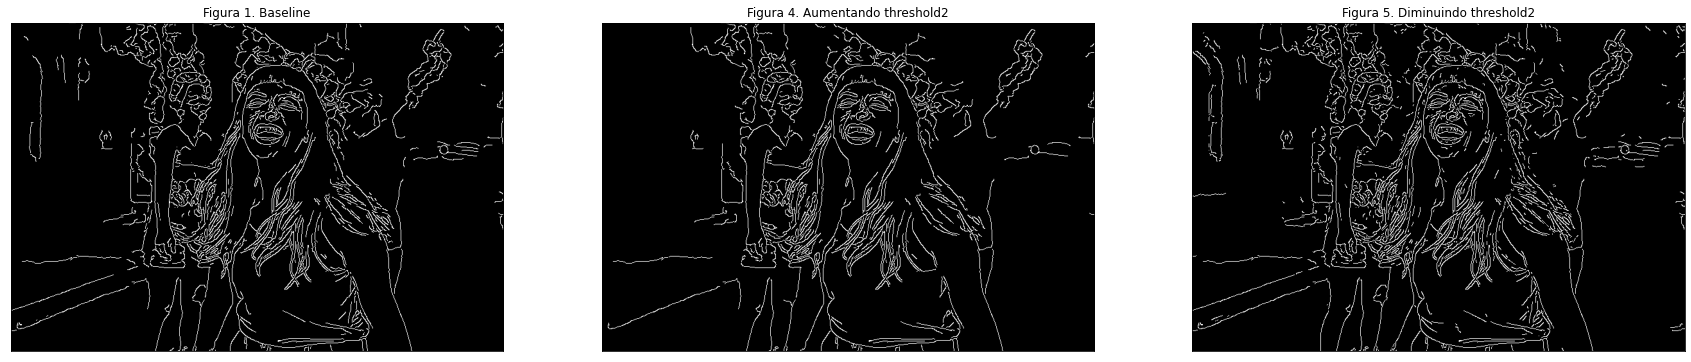

In [ ]:
# Analisando threshold2
plt.figure(figsize=(30, 10))

plt.subplot(131), plt.imshow(baseline, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.title('Figura 1. Baseline')

largeThreshold2 = cv.Canny(img,threshold1=1400,threshold2 = 2500, apertureSize = 5)
plt.subplot(132),plt.imshow(largeThreshold2, cmap="gray")
plt.title('Figura 4. Aumentando threshold2'), plt.xticks([]), plt.yticks([])

lowThreshold2 = cv.Canny(img,threshold1=1400,threshold2 = 1600, apertureSize = 5)
plt.subplot(133),plt.imshow(lowThreshold2, cmap="gray")
plt.title('Figura 5. Diminuindo threshold2'), plt.xticks([]), plt.yticks([])

plt.show()

**`threshold2`:** É o limite superior do Canny. Pixeis com gradiente superior a este limite são aceitos como bordas. Assim, ao aumentar esse parâmetro diminui-se a quantidade de pixeis aceitos como bordas, como se pode notar na **Figura 4** e, ao diminuí-lo, aumenta-se a quantidade de pixeis aceitos (**Figura 5**).

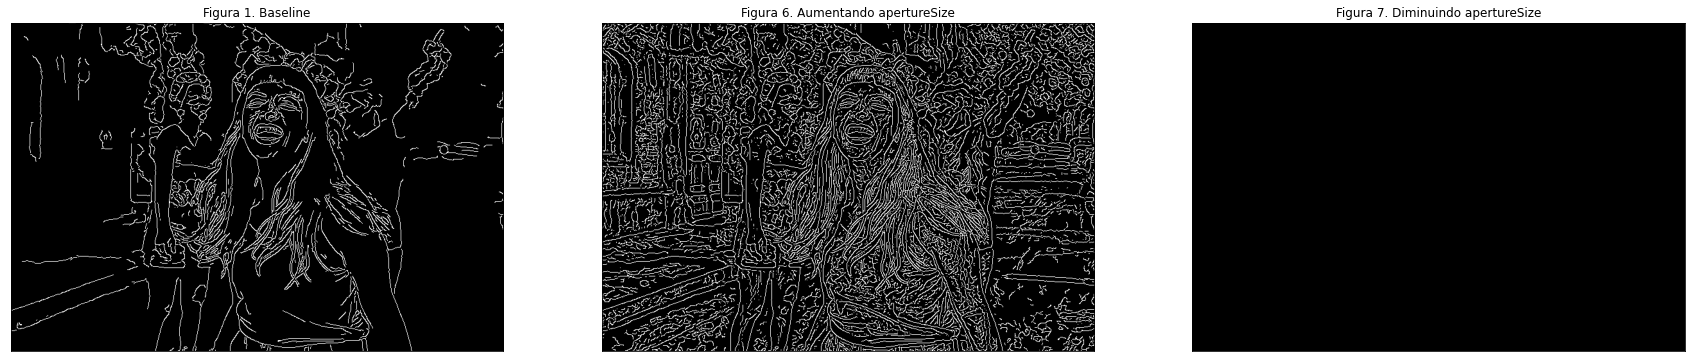

In [ ]:
# Analisando apertureSize
plt.figure(figsize=(30, 10))
plt.subplot(131), plt.imshow(baseline, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.title('Figura 1. Baseline')
largeAperture  = cv.Canny(img,threshold1=1400,threshold2 = 2000, apertureSize = 7)
plt.subplot(132),plt.imshow(largeAperture, cmap="gray")
plt.title('Figura 6. Aumentando apertureSize'), plt.xticks([]), plt.yticks([])
lowAperture = cv.Canny(img,threshold1=1400,threshold2 = 2000, apertureSize = 3)
plt.subplot(133),plt.imshow(lowAperture, cmap="gray")
plt.title('Figura 7. Diminuindo apertureSize'), plt.xticks([]), plt.yticks([])
plt.show()

**`apertureSize`:** É o tamanho do operador de Sobel. Quanto maior, mais pixeis são utilizados no processo de convolução e quanto menor, menos pixeis são utilizados. Nota-se que alterações nesse parâmetro podem resultar em mudanças drásticas na detecção de bordas. Na **Figura 6**., o parametro foi aumentado de 5 (Baseline) para 7 e a detecção foi extremamente alta, enquanto quando diminuído para 3 (**Figura 7**) a detecção foi nula.

# Questão 6


Implemente uma função que aumente a resolução da imagem por um fator `s`, onde `s` é um inteiro maior que 1, usando a abordagem de vizinho mais próximo. Você só pode usar o OpenCV para carregar a imagem. Aplique sua função em uma imagem, com 3 valores de `s` distintos.

In [ ]:
def interpolate(originalValues, positions, size):
    newMatrix = []

    for i in range(size):
      originalArray = originalValues[:, i] 
      newArray = [originalArray[x - 1] for x in positions]
      newMatrix.append(newArray)

    return np.array(newMatrix)

def NNUpersampling(image, s):
  (I, J, K)= image.shape

  newImg = []

  # Gerando canais aumentados
  for k in range(K):
    currentChannel = image[:, :, k]
    rowPositions =  np.ceil(np.arange(1, (I * s) + 1, 1) / (s)).astype('int')
    colPositions =  np.ceil(np.arange(1, (J * s) + 1, 1)  / (s)).astype('int')

    interpolation = interpolate(currentChannel, rowPositions, J)
    newChannel = interpolate(interpolation, colPositions, I * s)
    
    newImg.append(newChannel)
  
  # Ajustando as dimensões
  return np.array(newImg).transpose(1,2,0)

def plotPyramid(pyramid):
    m, n, k = pyramid[0].shape

    result = np.zeros((m, n + n // 2, 3), dtype=np.uint8)

    result[0:m, 0:n, :k] = pyramid[0]

    yoffset = 0
    xoffset = n
    
    for img in pyramid[1:]:
        ht, wd = img.shape[:2]
        result[yoffset:yoffset + ht, xoffset:xoffset + wd ] = img
        yoffset += ht

    plt.imshow(result)

In [ ]:
bgr = cv.imread("/content/computer-vision/data/rusbed.png")
img = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)

x2 = NNUpersampling(img, 2)
x4 = NNUpersampling(img, 4)
x8 = NNUpersampling(img, 8)

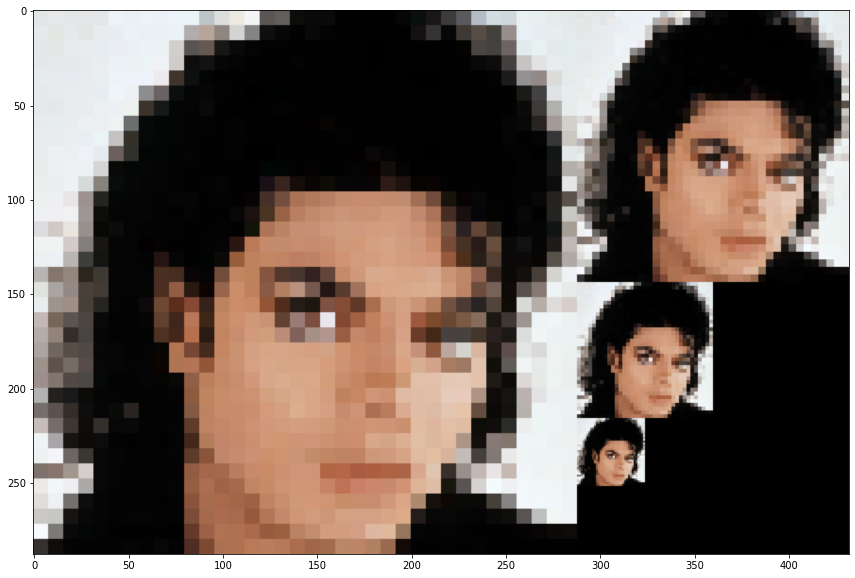

In [ ]:
plt.figure(figsize=(20,10))
plotPyramid([x8, x4, x2, img])
plt.show()

# Questão 7

Escolha uma imagem interessante e gere uma pirâmide aplicando
sucessivamente *downsampling* 3 vezes com fator 1/2. Faça o mesmo com
uma pirâmide gaussiana e compare os resultados. Mostre os resultados de
cada pirâmide em uma  ́unica imagem lado a lado, como no slides 20 (vai
exigir algumas operacões de translação de imagens). Obs.: aqui você pode
usar funções do OpenCV.

In [ ]:
def downsample(image, factor):
  (m, n) = image.shape
  newImage = np.zeros((m//factor, n//factor)).astype('int')

  for i in range(0, m, factor):
    for j in range(0, n, factor):  
      try:
        newImage[i//factor][j//factor] = image[i][j]

      except IndexError:
        pass

  return newImage

def rgbDownsample(image, factor):

  resultChannels = []

  for i in range(3):
    resultChannels.append(downsample(image[:,:,i], factor))

  return np.array(resultChannels).transpose(1,2,0)

In [ ]:
# Importando a imagem
  
original = cv.imread('/content/computer-vision/data/patinho.png')

In [ ]:
# Downsampling básico

x2 = rgbDownsample(original, 2)
x4 = rgbDownsample(x2, 2)
x8 = rgbDownsample(x4, 2)

In [ ]:
# Downsampling gaussiano
gaussX2 =  cv.pyrDown(original, dstsize=(original.shape[1] // 2, original.shape[0] // 2))
gaussX4 =  cv.pyrDown(gaussX2, dstsize=(gaussX2.shape[1] // 2, gaussX2.shape[0] // 2))
gaussX8 =  cv.pyrDown(gaussX4, dstsize=(gaussX4.shape[1] // 2, gaussX4.shape[0] // 2))

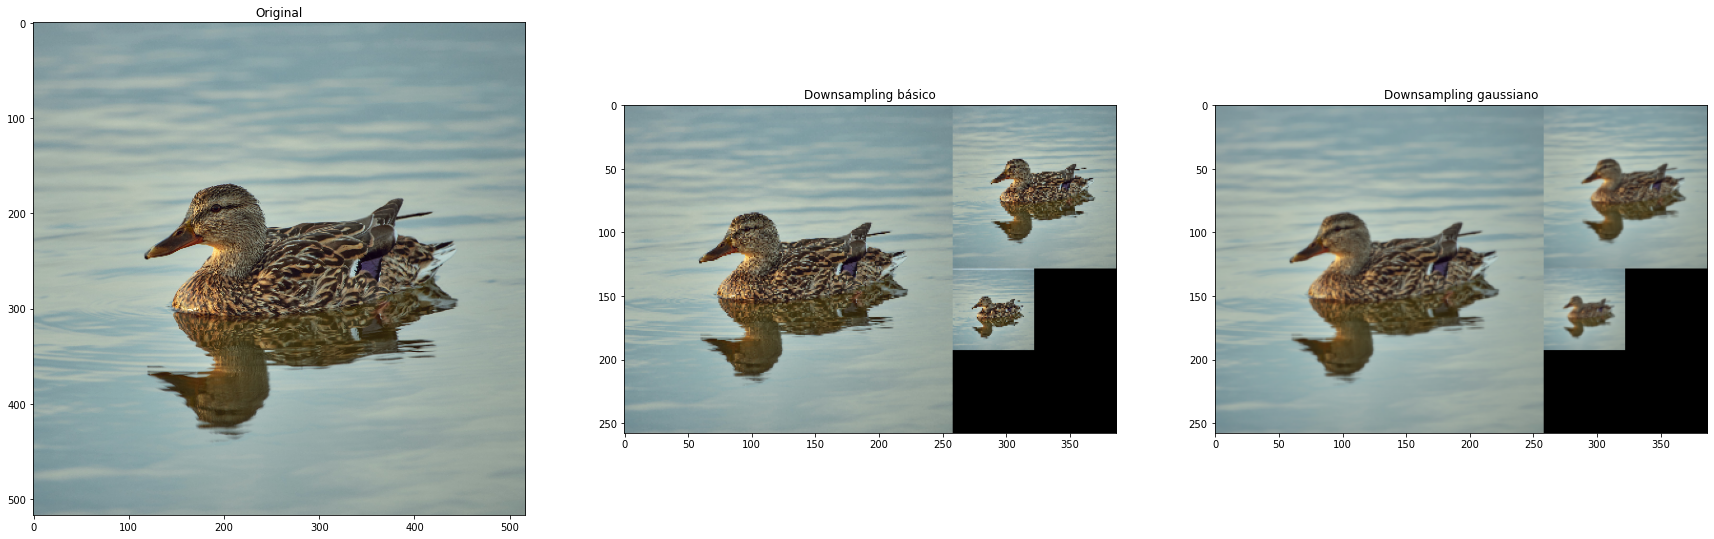

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(131), plt.imshow(original)
plt.title("Original")
plt.subplot(132), plotPyramid([x2, x4, x8])
plt.title("Downsampling básico")
plt.subplot(133), plotPyramid([gaussX2, gaussX4, gaussX8])
plt.title("Downsampling gaussiano")
plt.show()

Como esperado, o downsampling gaussiano provê versões da imagem mais suaves/embaçadas e de compreensão mais fácil em relação ao downsampling básico, que entrega versões mais pixeladas da imagem a medida que o tamanho diminui.

# Questão 8
Usando a função da questão 1, crie funções que apliquem filtros para calcular as imagens representando ∂f/∂x , ∂f/∂y e |∇f|. Em seguida, implemente o operador de Sobel usando estas imagens como entrada. Exiba cada um desses resultados para três imagens distintas.

In [ ]:
def rgb_to_grey(img):
  grey = np.dot(img[...,:3], [0.299, 0.587, 0.114])
  return np.dstack([grey]*3)

In [ ]:
def show_grey_img(img):
  plt.axis("off")
  img_abs = np.abs(img)
  plt.imshow(img_abs / np.amax(img_abs))

In [ ]:
def sobellike_kernel(n, axis=0):
  assert n % 2 != 0 and n > 1

  midindex = int((n + 1) / 2)

  op1 = np.concatenate((np.arange(1, midindex + 1),
                        np.arange(midindex - 1, 0, -1)))
  
  op1 = op1.reshape(n, 1)
  
  op2 = np.zeros(n)
  op2[: midindex - 1] = -1
  op2[midindex :] = 1
  op2 = op2.reshape(1, n)
  
  op3 = np.concatenate((np.arange(- midindex + 2, 1),
                        np.array([0]),
                        np.arange(0, midindex - 1)))

  kernel = (op1 * op2) + op3
  if axis == 1:
    kernel = kernel.T

  return kernel.astype("int")

In [ ]:
sobellike_kernel(3, axis=0)

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
sobellike_kernel(5, axis=1)

array([[-2, -3, -4, -3, -2],
       [-1, -2, -3, -2, -1],
       [ 0,  0,  0,  0,  0],
       [ 1,  2,  3,  2,  1],
       [ 2,  3,  4,  3,  2]])

In [ ]:
def apply_sobel_grad(img, n, file_path="output.ppm"):
  gx1 = apply_filter(rgb_to_grey(img), 
                    n,
                    sobellike_kernel(n, axis=0), 
                    file_path=file_path)
  gx2 = apply_filter(rgb_to_grey(img), 
                    n,
                    sobellike_kernel(n, axis=1), 
                    file_path=file_path)

  grad = np.sqrt((gx1 ** 2) + (gx2 ** 2))
  grad = grad / np.amax(grad)

  fig = plt.figure(figsize=(16, 8))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.axis("off")
  ax1.title.set_text("Sobel Horizontal (parcial em x)")
  ax1.imshow(np.abs(gx1) / np.amax(np.abs(gx1)))

  ax2 = fig.add_subplot(1, 3, 2)
  ax2.axis("off")
  ax2.title.set_text("Sobel Vertical (parcial em y)")
  ax2.imshow(np.abs(gx2) / np.amax(np.abs(gx2)))

  ax2 = fig.add_subplot(1, 3, 3)
  ax2.axis("off")
  ax2.title.set_text("Sobel Gradiente")
  ax2.imshow(grad)

  save_image_to_file(grad, file_path)

  return grad

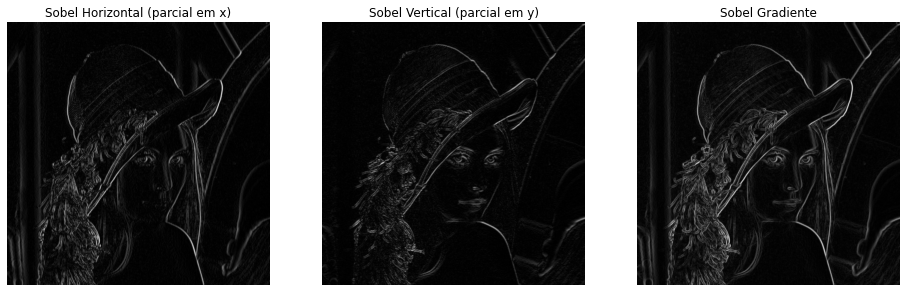

In [ ]:
_ = apply_sobel_grad(lenna, 3, file_path="lenna_sobel_grad.ppm")

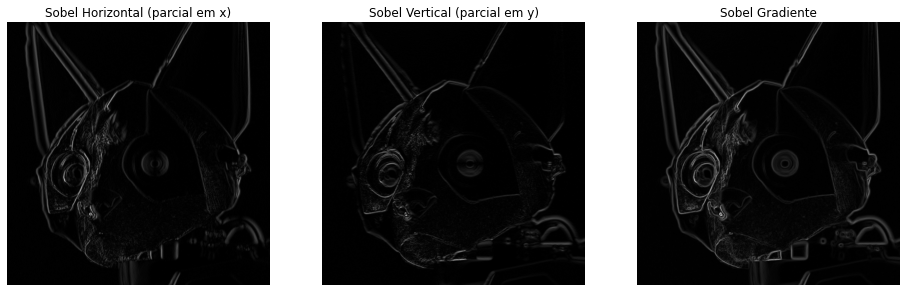

In [ ]:
_ = apply_sobel_grad(robocat, 5, file_path="robocat_sobel_grad.ppm")

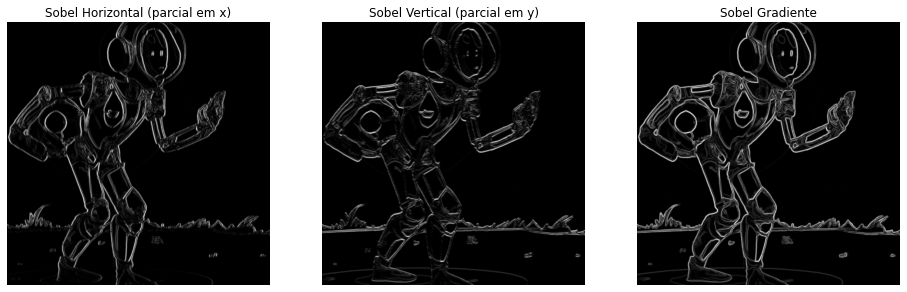

In [ ]:
_ = apply_sobel_grad(roboney, 7, file_path="roboney_sobel_grad.ppm")